#### COVID PROJECT
#### THE AIM OF THE PROJECT IS :TO ANALYZES AND VISUALIZES HOW COVID-19 HAS EVOLVED IN DIFFERENT COUNTRIES BY :
#### SHOWING PATTERNS LIKE CASE GROWTH, DEATH RATES, AND COMPARISONS — GIVING A CLEARER PICTURE OF THE PANDEMIC'S IMPACT ACROSS REGIONS.

# A. Project Setup and API fetching 

## Step 1: Install and Import Required Libraries

This section installs the `requests` library (if not already available) and imports the required modules for API requests and JSON handling.

In [7]:
# Import third-party module
import requests
# Import built-in Python modules
import json

## Step 2: Fetch Data from the COVID-19 API

The following code retrieves real-time country-level COVID-19 data from the public `disease.sh` API.  
#Exception handling is implemented to catch potential request or network issues.

In [61]:
# Define the API endpoint URL
url = "https://disease.sh/v3/covid-19/countries"

# Attempt to fetch data from the API
try:
    response = requests.get(url, timeout=10) # The section after the comma in the bracket recieves key word arguments which define how the request behaves  
    response.raise_for_status()  # Raises an HTTPError for bad responses by itself and tells the code "Stop something is wrong "
    covid_data = response.json()       # Convert the response to a Python object
    print(f"✅ Successfully fetched data for {len(covid_data)} countries.")
except Exception as e:
    print("Error fetching data:", e)

✅ Successfully fetched data for 231 countries.


## Step 3: Preview the First Record


In [9]:
covid_data[0]

{'updated': 1750793065423,
 'country': 'Afghanistan',
 'countryInfo': {'_id': 4,
  'iso2': 'AF',
  'iso3': 'AFG',
  'lat': 33,
  'long': 65,
  'flag': 'https://disease.sh/assets/img/flags/af.png'},
 'cases': 234174,
 'todayCases': 0,
 'deaths': 7996,
 'todayDeaths': 0,
 'recovered': 211080,
 'todayRecovered': 0,
 'active': 15098,
 'critical': 0,
 'casesPerOneMillion': 5746,
 'deathsPerOneMillion': 196,
 'tests': 1390730,
 'testsPerOneMillion': 34125,
 'population': 40754388,
 'continent': 'Asia',
 'oneCasePerPeople': 174,
 'oneDeathPerPeople': 5097,
 'oneTestPerPeople': 29,
 'activePerOneMillion': 370.46,
 'recoveredPerOneMillion': 5179.32,
 'criticalPerOneMillion': 0}

## Step 4: Save Raw JSON to data/ Folder

In [10]:
### In this step we are saving the API Response (Python Object) object into an acessible JSON File                                                   

# The below creates the file 'raw_data.json' in the 'data' folder.
# we are opening it with 'with open' to ensure the file is closed automatically and safely after writing.
# helps us access our data even after closing 
with open("data/raw_data.json", "w") as f:  
# The below line writes the covid_data (a Python object) into the file in JSON format.
# The indent=2 makes the file human-readable with structured indentation.
    json.dump(covid_data, f, indent=2)   ## and this will dump our API Response (Python Object) in to the already opened location called raw_data

print("Data successfully saved to 'data/raw_data.json'.")


Data successfully saved to 'data/raw_data.json'.


## Step 5 : Load the JSON File into a Pandas DataFrame

# B. Data Cleaning and Preprocessing

## Step 1 : Load the JSON File into a Pandas DataFrame

In [11]:
import pandas as pd

# Load the saved JSON file for analysis
df2 = pd.read_json("data/raw_data.json")
df2.head()

,updated,country,countryInfo,cases,todayCases,deaths,todayDeaths,recovered,todayRecovered,active,...,tests,testsPerOneMillion,population,continent,oneCasePerPeople,oneDeathPerPeople,oneTestPerPeople,activePerOneMillion,recoveredPerOneMillion,criticalPerOneMillion
0,1750793065423,Afghanistan,"{'_id': 4, 'iso2': 'AF', 'iso3': 'AFG', 'lat':...",234174,0,7996,0,211080,0,15098,...,1390730,34125,40754388,Asia,174,5097,29,370.46,5179.32,0.0
1,1750793065415,Albania,"{'_id': 8, 'iso2': 'AL', 'iso3': 'ALB', 'lat':...",334863,0,3605,0,330233,0,1025,...,1941032,677173,2866374,Europe,9,795,1,357.59,115209.32,0.0
2,1750793065418,Algeria,"{'_id': 12, 'iso2': 'DZ', 'iso3': 'DZA', 'lat'...",272010,0,6881,0,183061,0,82068,...,230960,5093,45350148,Africa,167,6591,196,1809.65,4036.61,0.0
3,1750793065472,Andorra,"{'_id': 20, 'iso2': 'AD', 'iso3': 'AND', 'lat'...",48015,0,165,0,0,0,47850,...,249838,3225256,77463,Europe,2,469,0,617714.26,0.00,0.0
4,1750793065444,Angola,"{'_id': 24, 'iso2': 'AO', 'iso3': 'AGO', 'lat'...",107327,0,1937,0,103419,0,1971,...,1499795,42818,35027343,Africa,326,18083,23,56.27,2952.52,0.0


## Step 2: Inspect and Rename Columns

In [12]:
df2 = df2.rename(columns=str.title)



In [13]:
print(df2.columns.tolist())

['Updated', 'Country', 'Countryinfo', 'Cases', 'Todaycases', 'Deaths', 'Todaydeaths', 'Recovered', 'Todayrecovered', 'Active', 'Critical', 'Casesperonemillion', 'Deathsperonemillion', 'Tests', 'Testsperonemillion', 'Population', 'Continent', 'Onecaseperpeople', 'Onedeathperpeople', 'Onetestperpeople', 'Activeperonemillion', 'Recoveredperonemillion', 'Criticalperonemillion']


In [14]:
df2.head()

,Updated,Country,Countryinfo,Cases,Todaycases,Deaths,Todaydeaths,Recovered,Todayrecovered,Active,...,Tests,Testsperonemillion,Population,Continent,Onecaseperpeople,Onedeathperpeople,Onetestperpeople,Activeperonemillion,Recoveredperonemillion,Criticalperonemillion
0,1750793065423,Afghanistan,"{'_id': 4, 'iso2': 'AF', 'iso3': 'AFG', 'lat':...",234174,0,7996,0,211080,0,15098,...,1390730,34125,40754388,Asia,174,5097,29,370.46,5179.32,0.0
1,1750793065415,Albania,"{'_id': 8, 'iso2': 'AL', 'iso3': 'ALB', 'lat':...",334863,0,3605,0,330233,0,1025,...,1941032,677173,2866374,Europe,9,795,1,357.59,115209.32,0.0
2,1750793065418,Algeria,"{'_id': 12, 'iso2': 'DZ', 'iso3': 'DZA', 'lat'...",272010,0,6881,0,183061,0,82068,...,230960,5093,45350148,Africa,167,6591,196,1809.65,4036.61,0.0
3,1750793065472,Andorra,"{'_id': 20, 'iso2': 'AD', 'iso3': 'AND', 'lat'...",48015,0,165,0,0,0,47850,...,249838,3225256,77463,Europe,2,469,0,617714.26,0.00,0.0
4,1750793065444,Angola,"{'_id': 24, 'iso2': 'AO', 'iso3': 'AGO', 'lat'...",107327,0,1937,0,103419,0,1971,...,1499795,42818,35027343,Africa,326,18083,23,56.27,2952.52,0.0


## Step 3: Keep Only Selected Columns

In [15]:
#For this project, we retain only the following columns from the dataset:
## country
## cases
## deaths
## recovered

In [42]:
#🧹 Select only relevant columns for analysis
columns_to_keep = ["Country", "Cases", "Deaths", "Recovered"]
df2 = df2[columns_to_keep]
df2.head()

,Country,Cases,Deaths,Recovered
0,Afghanistan,234174,7996,211080
1,Albania,334863,3605,330233
2,Algeria,272010,6881,183061
3,Andorra,48015,165,0
4,Angola,107327,1937,103419


## Step 4: Check for Missing Values

In [17]:
df2.isnull().sum()
# If you dont add the code ".sum()" it will list all the table values and would tell "True" or "False" for each cell

Country      0
Cases        0
Deaths       0
Recovered    0
dtype: int64

## Step 5: Drop Rows with Missing Data

In [18]:
#Here assuming that there were null rows

In [31]:
df_cleaned = df2.dropna()
print(f"🧹 Remaining rows after null drop: {df_cleaned.shape[0]}")

🧹 Remaining rows after null drop: 231


## Step 6: Drop Duplicate Rows

In [20]:
df2 = df2.drop_duplicates()

## Step 7: Clean Text Columns (Trim Spaces, Lowercase Country Names)

In [21]:
#Preview original country values (before cleaning)
df2["Country"].unique()[:7]

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda'], dtype=object)

In [29]:
# Remove leading/trailing spaces from country names     
### Strip extra spaces
## assuming there are training spaces 
## and uncapitalized countries
df2["country"] = df2["Country"].where(df2["Country"].notnull(), None) 
df2["country"] = df2["country"].str.strip().str.title()

In [ ]:
#Confirm cleaned names
df2["country"].unique()[:7]

In [ ]:
df2.head()

## Step 8: Convert Numeric Columns to Integers

In [45]:
# Convert string/object columns to integers
df2 = df[df["Cases"] > 1000].copy()

df2["Cases"] = df2["Cases"].astype(int)
df2["Deaths"] = df2["Deaths"].astype(int)
df2["Recovered"] = df2["Recovered"].astype(int)


## Step 9: Filter Countries with More Than 10,000 Cases

In [46]:
# 🌍 Filter: Keep only countries with significant case counts
df_filtered = df_cleaned[df_cleaned["Cases"] > 10000]
print(f"🌍 Countries with >10,000 cases: {len(df_filtered)}")
df_filtered.head()

🌍 Countries with >10,000 cases: 201


,Country,Cases,Deaths,Recovered,country
0,Afghanistan,234174,7996,211080,Afghanistan
1,Albania,334863,3605,330233,Albania
2,Algeria,272010,6881,183061,Algeria
3,Andorra,48015,165,0,Andorra
4,Angola,107327,1937,103419,Angola


In [ ]:
# to get the number of cases that have more than 10000 cases 
len(df_filtered)

## Step 10: Extract Top 10 Countries by Case Count

In [ ]:
# To get the list of countries together with their other corresponding data 
top10=df_filtered.sort_values(by="cases", ascending=False).head(10)
top10

In [ ]:
top10_countries = top10["country"].tolist()

In [ ]:
# to get the list of countrie s 
top10_countries

 ## Step 11: Save Cleaned Data to CSV

In [ ]:
df_filtered.to_csv("data/cleaned_data.csv", index=False)
print(" Cleaned data saved")


# C. Exploration and Analysis 


In [ ]:
 ## Step 1: Load cleaned_data.csv

In [47]:
# 📦 Import plotting and analysis libraries
!pip install seaborn -q
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dfc = pd.read_csv("data/cleaned_data.csv") ## dfc stands for Data Frame in CSV Format
dfc.head()

,Updated,Country,Countryinfo,Cases,Todaycases,Deaths,Todaydeaths,Recovered,Todayrecovered,Active,...,Tests,Testsperonemillion,Population,Continent,Onecaseperpeople,Onedeathperpeople,Onetestperpeople,Activeperonemillion,Recoveredperonemillion,Criticalperonemillion
0,1750452871060,Afghanistan,"{'_id': 4, 'iso2': 'AF', 'iso3': 'AFG', 'lat':...",234174,0,7996,0,211080,0,15098,...,1390730,34125,40754388,Asia,174,5097,29,370.46,5179.32,0.0
1,1750452871050,Albania,"{'_id': 8, 'iso2': 'AL', 'iso3': 'ALB', 'lat':...",334863,0,3605,0,330233,0,1025,...,1941032,677173,2866374,Europe,9,795,1,357.59,115209.32,0.0
2,1750452871055,Algeria,"{'_id': 12, 'iso2': 'DZ', 'iso3': 'DZA', 'lat'...",272010,0,6881,0,183061,0,82068,...,230960,5093,45350148,Africa,167,6591,196,1809.65,4036.61,0.0
3,1750452871113,Andorra,"{'_id': 20, 'iso2': 'AD', 'iso3': 'AND', 'lat'...",48015,0,165,0,0,0,47850,...,249838,3225256,77463,Europe,2,469,0,617714.26,0.00,0.0
4,1750452871090,Angola,"{'_id': 24, 'iso2': 'AO', 'iso3': 'AGO', 'lat'...",107327,0,1937,0,103419,0,1971,...,1499795,42818,35027343,Africa,326,18083,23,56.27,2952.52,0.0


## Step 2: Basic Data Overview

In [37]:
import numpy as np

# Basic Pandas overview
# To print the the number of rows and Columns 
print(f"📐 Data shape: {dfc.shape[0]} rows × {df.shape[1]} columns")
# To print the names the columns in list format put down on a lsit
print("🧾 Columns:", ', '.join(df.columns))
# To print the data Types of each Column 
print("🔎 Data Types:\n", df.dtypes)

# NumPy array conversion-helps faster and more efficient for numerical operations .We can do it depending on the type of operations we 'd like to do
numeric_array = dfc.select_dtypes(include=[np.number]).to_numpy()
print("\nConverted numeric DataFrame to NumPy array with shape:", numeric_array.shape)

📐 Data shape: 201 rows × 25 columns
🧾 Columns: Updated, Country, Countryinfo, Cases, Todaycases, Deaths, Todaydeaths, Recovered, Todayrecovered, Active, Critical, Casesperonemillion, Deathsperonemillion, Tests, Testsperonemillion, Population, Continent, Onecaseperpeople, Onedeathperpeople, Onetestperpeople, Activeperonemillion, Recoveredperonemillion, Criticalperonemillion, Mortality_Rate, Active_Cases
🔎 Data Types:
 Updated                     int64
Country                    object
Countryinfo                object
Cases                       int64
Todaycases                  int64
Deaths                      int64
Todaydeaths                 int64
Recovered                   int64
Todayrecovered              int64
Active                      int64
Critical                    int64
Casesperonemillion          int64
Deathsperonemillion         int64
Tests                       int64
Testsperonemillion          int64
Population                  int64
Continent                  object
O

## Step 3: Missing Values Check

In [38]:
print("🧼 Missing values per column:\n", dfc.isnull().sum().sort_values(ascending=False))

🧼 Missing values per column:
 Updated                   0
Country                   0
Countryinfo               0
Cases                     0
Todaycases                0
Deaths                    0
Todaydeaths               0
Recovered                 0
Todayrecovered            0
Active                    0
Critical                  0
Casesperonemillion        0
Deathsperonemillion       0
Tests                     0
Testsperonemillion        0
Population                0
Continent                 0
Onecaseperpeople          0
Onedeathperpeople         0
Onetestperpeople          0
Activeperonemillion       0
Recoveredperonemillion    0
Criticalperonemillion     0
dtype: int64


# Step 4: Check for Duplicate Rows

In [39]:
print(f"📑 Number of duplicate rows: {dfc.duplicated().sum()}")

📑 Number of duplicate rows: 0


## Step 5: Summary Statistics

In [40]:
# Pandas describe for comparison
print("📊 Summary statistics:\n", dfc.describe())
import numpy as np
# NumPy statistics
numeric_data = dfc.select_dtypes(include=[np.number])

print("\nNumPy Mean:\n", np.mean(numeric_data, axis=0))
print("\nNumPy Median:\n", np.median(numeric_data, axis=0))
print("\nNumPy Std Dev:\n", np.std(numeric_data, axis=0))
print("\nNumPy 25th Percentile:\n", np.percentile(numeric_data, 25, axis=0))
print("\nNumPy 75th Percentile:\n", np.percentile(numeric_data, 75, axis=0))

📊 Summary statistics:
             Updated         Cases  Todaycases        Deaths  Todaydeaths  \
count  2.010000e+02  2.010000e+02       201.0  2.010000e+02        201.0   
mean   1.750453e+12  3.505496e+06         0.0  3.486977e+04          0.0   
std    7.606663e+01  1.067192e+07         0.0  1.164606e+05          0.0   
min    1.750453e+12  1.018900e+04         0.0  1.300000e+01          0.0   
25%    1.750453e+12  5.122000e+04         0.0  4.200000e+02          0.0   
50%    1.750453e+12  3.493040e+05         0.0  3.605000e+03          0.0   
75%    1.750453e+12  1.746997e+06         0.0  1.868700e+04          0.0   
max    1.750453e+12  1.118201e+08         0.0  1.219487e+06          0.0   

          Recovered  Todayrecovered        Active    Critical  \
count  2.010000e+02      201.000000  2.010000e+02  201.000000   
mean   2.788360e+06        4.099502  6.822658e+05   14.233831   
std    9.810394e+06       37.034984  4.168470e+06   76.161342   
min    0.000000e+00        0.000

## Step 6: Univariate Analysis (e.g Total Cases)

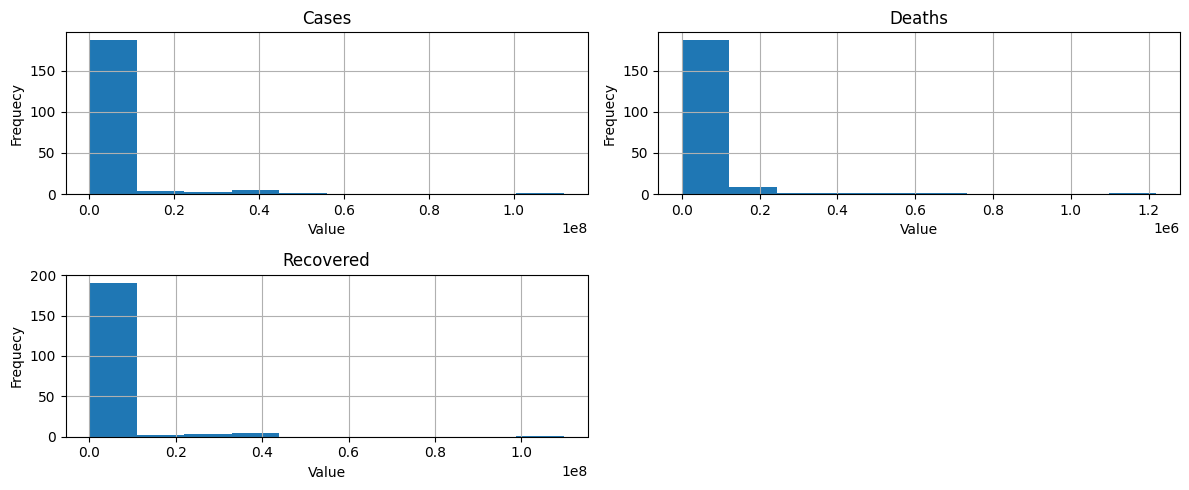

NameError: name 'fig' is not defined

In [49]:
import matplotlib.pyplot as plt
plt.close('all')

from IPython.display import clear_output

clear_output(wait=True)  # Clears the previous output in the notebook cell


##  to make our  histogram and  make our  histogram understandable we add axes labels 
axes=dfc[["Cases", "Deaths" ,"Recovered"]].hist(figsize=(12,5))
for ax in axes.flatten():
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequecy")
plt.tight_layout()
plt.show()
fig.savefig('images/bar_plot_frequency_and_vales_of_Cases_Death_Recovered.png')
print("Figure saved to images/bar_plot_frequency_and_vales_of_Cases_Death_Recovered.png")


## Step 7: Bivariate Analysis

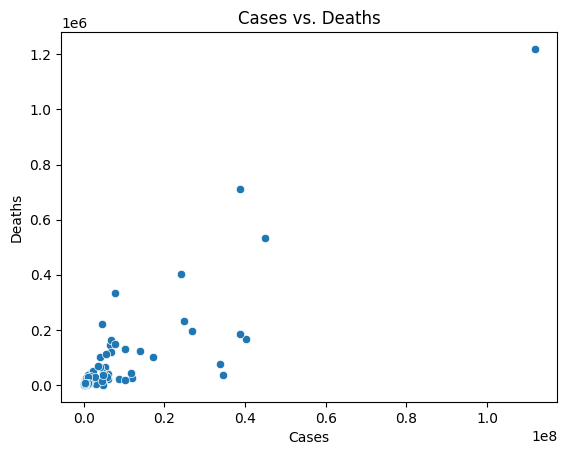

Figure saved to images/scatter_plot_cases_versus_deaths.png


In [51]:
# 📉 Scatter plot: Total Cases vs Total Deaths
sns.scatterplot(data=dfc, x="Cases", y="Deaths")
plt.title("Cases vs. Deaths")
fig = plt.gcf()  # get current figure
fig.savefig('images/scatter_plot_cases_versus_deaths.png')
plt.show()
print("Figure saved to images/scatter_plot_cases_versus_deaths.png")

In [ ]:
# scatter plotting using different colors 
import matplotlib.pyplot as plt

x = dfc.index  # or your Date column if you have one

fig, ax1 = plt.subplots(figsize=(8,5))

# Plot Cases on left y-axis
ax1.scatter(x, dfc['Cases'], color='blue', label='Cases', alpha=0.6)
ax1.set_xlabel('Record Number')
ax1.set_ylabel('Total Cases', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Deaths
ax2 = ax1.twinx()
ax2.scatter(x, dfc['Deaths'], color='red', label='Deaths', alpha=0.6)
ax2.set_ylabel('Total Deaths', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('COVID Cases (blue) vs Deaths (red)')
fig.tight_layout()
plt.show()

fig.savefig('images/scatter_plot_with_colors.png')
print("Figure saved to images/scatter_plot_with_color.png")

## Step 8 : Outlier Detection (Simple View)

In [ ]:
!pip install scipy -q
from scipy.stats import zscore

plt.figure(figsize=(10, 4))
sns.boxplot(data=dfc[["Cases", "Deaths", "Recovered"]])
plt.title("Boxplot of Case Metrics")
plt.show()

# NumPy-based Z-score calculation
z_scores = zscore(dfc[["Cases", "Deaths", "Recovered"]])
outliers = (np.abs(z_scores) > 3).any(axis=1)
print(f"Number of outliers (Z-score > 3): {outliers.sum()}")

fig.savefig('images/box_plot_cases_outliers.png')
print("Figure saved to images/box_plot_cases_outliers.png")

## Step 9 Correlation Matrix

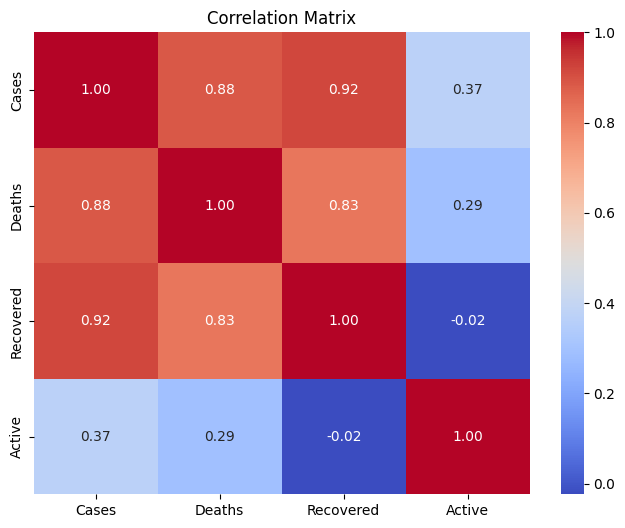

In [50]:
# 🔥 Correlation heatmap of numeric COVID metrics
plt.figure(figsize=(8, 6))
subset=dfc[["Cases","Deaths","Recovered","Active"]]
sns.heatmap(subset.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Pandas correlation 
plt.figure(figsize=(8, 6))
sns.heatmap(dfc[["Cases", "Deaths","Recovered"]].corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# NumPy correlation matrix (as alternative)
corr_matrix = np.corrcoef(dfc[["Cases", "Deaths", "Recovered"]].to_numpy().T)
print("NumPy Correlation Matrix:\n", corr_matrix)

fig.savefig('images/heat_map_cases_correlation.png')
print("Figure saved to images/heat_map_correlation.png")

## Step 10: Feature Engineering – Mortality Rate

In [ ]:
# Creating New Feature "Mortality Rate" Using Pandas  
dfc["Mortality_Rate"] = dfc["Deaths"] / dfc["Cases"]
dfc[["Country", "Cases", "Deaths", "Mortality_Rate"]].head()


# Creating New Feature "Active Cases" Using Numpy  
#New feature: Active Cases = Cases - Deaths - Recovered
cases = dfc["Cases"].to_numpy()
deaths = dfc["Deaths"].to_numpy()
recovered = dfc["Recovered"].to_numpy()

active_cases = cases - deaths - recovered
dfc["Active_Cases"] = active_cases

dfc[["Country", "Active_Cases"]].head()

In [ ]:
# NumPy-based top/bottom mortality rates
non_zero = dfc["Mortality_Rate"] > 0
mortality_array = dfc["Mortality_Rate"].to_numpy()

highest_idx = np.argmax(mortality_array)
lowest_idx = np.argmin(np.where(non_zero, mortality_array, np.inf))

print("🔴 Highest Mortality Rate Country:")
print(dfc.loc[highest_idx, ["Country", "Mortality_Rate"]])

print("\n🟢 Lowest (Non-zero) Mortality Rate Country:")
print(dfc.loc[lowest_idx, ["Country", "Mortality_Rate"]])

## Step 11: Print Countries with Highest and Lowest Mortality

In [ ]:
# 🧮 Identify top and bottom countries by Mortality Rate
highest = dfc.sort_values(by="Mortality_Rate", ascending=False).head(5)
lowest = dfc[dfc["Mortality_Rate"] > 0].sort_values(by="Mortality_Rate").head(5)

print("🔴 Highest Mortality:")
print(highest[["Country", "Mortality_Rate"]])

print("\n🟢 Lowest Mortality (non-zero):")
print(lowest[["Country", "Mortality_Rate"]])

## Step 12: Final Save

In [ ]:
dfc.to_csv("data/with_mortality_and_active_cases.csv", index=False)
print("✅ Saved updated data to data/with_mortality_and_active_cases.csv")

# D. OTHER VISUALIZATIONS

In [56]:
# Load your COVID dataset
# For the sake of convinience we we will name the data frame of the visualization dfv(Data Frame of Visualization)
dfv = pd.read_csv("data/with_mortality_and_active_cases.csv")
dfv.head()

,Updated,Country,Countryinfo,Cases,Todaycases,Deaths,Todaydeaths,Recovered,Todayrecovered,Active,...,Population,Continent,Onecaseperpeople,Onedeathperpeople,Onetestperpeople,Activeperonemillion,Recoveredperonemillion,Criticalperonemillion,Mortality_Rate,Active_Cases
0,1750452871060,Afghanistan,"{'_id': 4, 'iso2': 'AF', 'iso3': 'AFG', 'lat':...",234174,0,7996,0,211080,0,15098,...,40754388,Asia,174,5097,29,370.46,5179.32,0.0,0.034146,15098
1,1750452871050,Albania,"{'_id': 8, 'iso2': 'AL', 'iso3': 'ALB', 'lat':...",334863,0,3605,0,330233,0,1025,...,2866374,Europe,9,795,1,357.59,115209.32,0.0,0.010766,1025
2,1750452871055,Algeria,"{'_id': 12, 'iso2': 'DZ', 'iso3': 'DZA', 'lat'...",272010,0,6881,0,183061,0,82068,...,45350148,Africa,167,6591,196,1809.65,4036.61,0.0,0.025297,82068
3,1750452871113,Andorra,"{'_id': 20, 'iso2': 'AD', 'iso3': 'AND', 'lat'...",48015,0,165,0,0,0,47850,...,77463,Europe,2,469,0,617714.26,0.00,0.0,0.003436,47850
4,1750452871090,Angola,"{'_id': 24, 'iso2': 'AO', 'iso3': 'AGO', 'lat'...",107327,0,1937,0,103419,0,1971,...,35027343,Africa,326,18083,23,56.27,2952.52,0.0,0.018048,1971


## Line Plots - To see how the variables change continuously 

In [58]:
## Line plot to see time progression  with time 
## In the case of the data worked on this project the original data does not have "Date" Column
##For the sake of giving meaning to the line plot we'll give introduce a date column do depict a line plot 

dfv["Date"]=pd.date_range(start='2020-01-01',periods=len(dfv),freq='D' )
dfv["Date"].head()


0   2020-01-01
1   2020-01-02
2   2020-01-03
3   2020-01-04
4   2020-01-05
Name: Date, dtype: datetime64[ns]

Figure saved to images/line_plot_progression.png


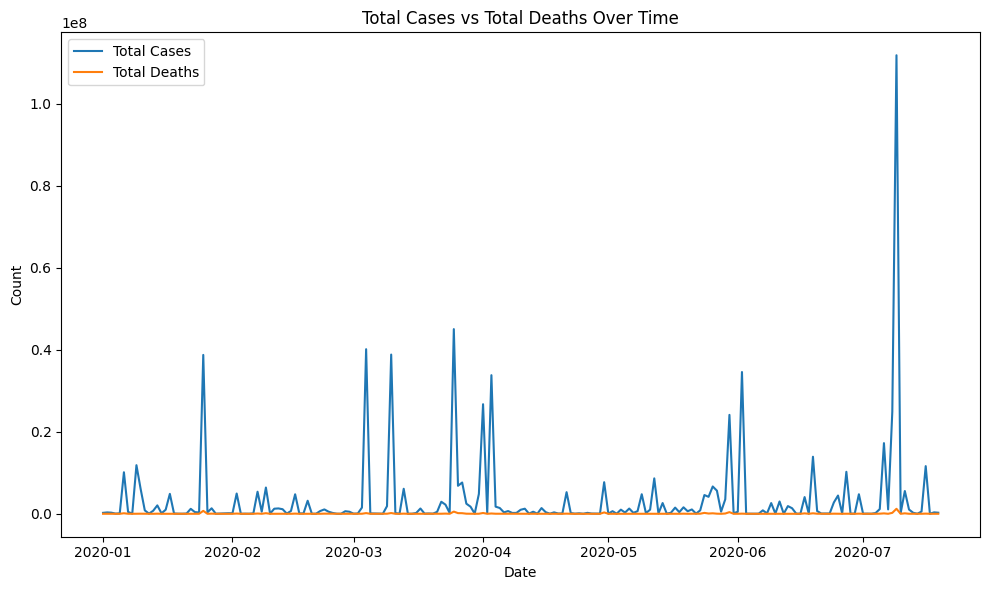

In [59]:
# 📈 Line plot: COVID case trend over time
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=dfv, x='Date', y='Cases', label='Total Cases', ax=ax)
sns.lineplot(data=dfv, x='Date', y='Deaths', label='Total Deaths', ax=ax)

ax.set_title('Total Cases vs Total Deaths Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.legend()

fig.tight_layout()
fig.savefig('images/line_plot_progression.png')
print("Figure saved to images/line_plot_progression.png")

plt.show()

## Pie Charts- showing shares of particular cases over a total 

Figure saved to images/pie_chart_percentage_shares_bycontinenet.png


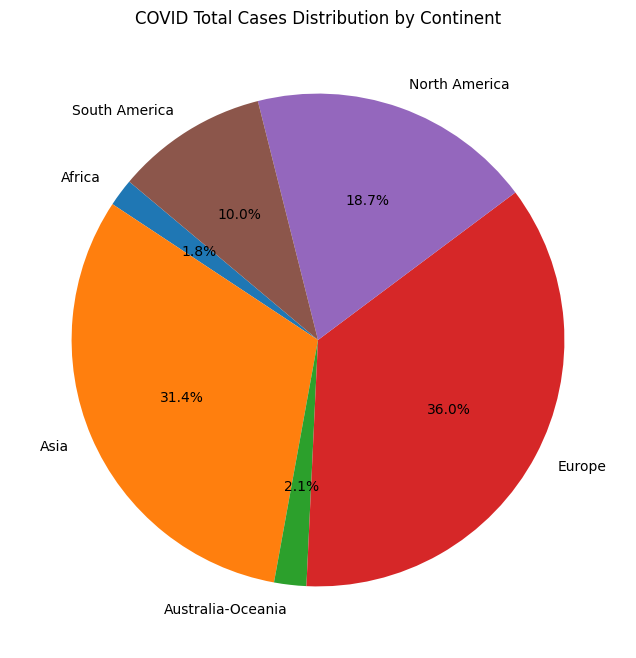

In [60]:
# 🥧 Pie chart: Case distribution across continents
continent_cases = dfv.groupby('Continent')['Cases'].sum()

fig, ax=plt.subplots(figsize=(8, 8))
ax.pie(continent_cases, labels=continent_cases.index, autopct='%1.1f%%', startangle=140)
ax.set_title('COVID Total Cases Distribution by Continent')
plt.show

fig.savefig('images/pie_chart_percentage_shares_bycontinenet.png')
print("Figure saved to images/pie_chart_percentage_shares_bycontinenet.png")

## SAVING PLOTS

In [ ]:
## saving plots can be done when ever plots where madelike we did in the abobe plots 
## here one saving is shown for th esake of example 
fig.savefig('images/cases_deaths_plots.png')
print("Figure saved to images/total_cases_distribution.png")

# E. Basic Modularization

## Define Utility Functions 

In [ ]:
def load_data(filepath):
    """
    Load and return the COVID dataset.
    """
    return pd.read_csv(filepath)


def save_plot(fig, filename, folder="images"):
    """
    Save a matplotlib figure with tight layout.
    """
    fig.tight_layout()
    path = f"{folder}/{filename}.png"
    fig.savefig(path)
    print(f"Saved plot to {path}")


def plot_bar_top_countries(df, column='Cases', top_n=10):
    """
    Bar chart of top N countries by a specific column.
    """
    top_countries = df.sort_values(by=column, ascending=False).head(top_n)
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(data=top_countries, x='Country', y=column, ax=ax)
    ax.set_title(f'Top {top_n} Countries by {column}')
    ax.set_xlabel('Country')
    ax.set_ylabel(column)
    save_plot(fig, f"bar_top_{top_n}_{column.lower()}")
    plt.show()

In [ ]:
def plot_box(df, columns):
    """
    Boxplot for selected numeric columns.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(data=df[columns], ax=ax)
    ax.set_title('Boxplot for Selected Columns')
    save_plot(fig, "boxplot_selected_columns")
    plt.show()

In [ ]:
def plot_heatmap(df, columns):
    """
    Correlation heatmap of selected numeric columns.
    """
    corr = df[columns].corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap="coolwarm", ax=ax)
    ax.set_title('Correlation Heatmap')
    save_plot(fig, "heatmap_correlation")
    plt.show()

In [ ]:
def plot_pie_by_group(df, group_col, value_col):
    """
    Pie chart showing distribution of values by group.
    """
    group_sum = df.groupby(group_col)[value_col].sum()
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(group_sum, labels=group_sum.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{value_col} Distribution by {group_col}')
    save_plot(fig, f"pie_{value_col.lower()}_by_{group_col.lower()}")
    plt.show()

In [ ]:
def plot_scatter(df, x_col, y_col, hue_col=None):
    """
    Scatter plot with optional hue for category-based color coding.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue_col, ax=ax)
    ax.set_title(f'{y_col} vs {x_col}')
    save_plot(fig, f"scatter_{y_col.lower()}_vs_{x_col.lower()}")
    plt.show()

In [ ]:
# Load your data
df = load_data("data/with_mortality_and_active_cases.csv")

# Run key visualizations
plot_bar_top_countries(df, column='Cases')
plot_box(df, ['Cases', 'Deaths'])
plot_heatmap(df, ['Cases', 'Deaths', 'Recovered'])  # Adjust columns to what you have
plot_pie_by_group(df, group_col='Continent', value_col='Cases')
plot_scatter(df, x_col='Cases', y_col='Deaths')  # You can add hue='Continent' if needed

# F. Final Project Assembly

## Create run_all.py and import modules 

In [ ]:
"""
run_all.py

Entry-level script to load, clean, feature-engineer, visualize, and save plots
for the COVID summary dataset—all in one place.
"""

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load & Clean
df = pd.read_csv("data/cleaned_data.csv")
df = df.dropna()  # simple clean: drop missing

# 2) Feature Engineering
df["Mortality_Rate"] = df["Deaths"] / df["Cases"]
df["Active_Cases"]   = df["Cases"] - df["Deaths"] - df["Recovered"]

# Ensure images folder exists
os.makedirs("images", exist_ok=True)

# 3) Visualizations

# A) Bar chart of top 10 by cases
top10 = df.sort_values("Cases", ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(data=top10, x="Country", y="Cases")
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Total Cases")
plt.tight_layout()
plt.savefig("images/top10_cases.png")
plt.close()

# B) Scatter cases vs deaths
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x="Cases", y="Deaths")
plt.title("Cases vs Deaths")
plt.tight_layout()
plt.savefig("images/scatter_cases_deaths.png")
plt.close()

# C) Heatmap of correlations
plt.figure(figsize=(6,5))
sns.heatmap(df[["Cases","Deaths","Recovered","Mortality_Rate","Active_Cases"]].corr(),
            annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("images/correlation_heatmap.png")
plt.close()

print("✅ All plots saved in the images/ folder")

## Run_end_to_end_Verify

In [ ]:
import os
print("Working dir:", os.getcwd())
print("Top-level files:", os.listdir("."))
print("modules/ contains:", os.listdir("modules"))

In [ ]:
from modules.api_fetch import fetch_covid_data
print(fetch_covid_data)

In [24]:
import pandas as pd
df = pd.read_csv("data/cleaned_data.csv")
print(df.columns)

Index(['Updated', 'Country', 'Countryinfo', 'Cases', 'Todaycases', 'Deaths',
       'Todaydeaths', 'Recovered', 'Todayrecovered', 'Active', 'Critical',
       'Casesperonemillion', 'Deathsperonemillion', 'Tests',
       'Testsperonemillion', 'Population', 'Continent', 'Onecaseperpeople',
       'Onedeathperpeople', 'Onetestperpeople', 'Activeperonemillion',
       'Recoveredperonemillion', 'Criticalperonemillion'],
      dtype='object')


In [26]:
import pandas as pd
df = pd.read_csv("data/with_mortality_and_active_cases.csv")
print(df.columns.tolist())

['Updated', 'Country', 'Countryinfo', 'Cases', 'Todaycases', 'Deaths', 'Todaydeaths', 'Recovered', 'Todayrecovered', 'Active', 'Critical', 'Casesperonemillion', 'Deathsperonemillion', 'Tests', 'Testsperonemillion', 'Population', 'Continent', 'Onecaseperpeople', 'Onedeathperpeople', 'Onetestperpeople', 'Activeperonemillion', 'Recoveredperonemillion', 'Criticalperonemillion', 'Mortality_Rate', 'Active_Cases']
